In [1]:
!ls ../airflow/plugins/utils

db.py  __pycache__  tinkoff.py


In [2]:
import sys  
sys.path.insert(0, '../airflow/plugins/utils')

In [18]:
import pandas as pd
import numpy as np
import db
import matplotlib.pyplot as plt

In [5]:
def _get_db_url(connector: str) -> str:
    return f'user=trader password=income host=localhost port=5432 dbname=stocks'

In [6]:
db._get_db_url = _get_db_url

In [8]:
data = db.get_data_from_table('posdf', 'aapl')

In [9]:
SMA_SHORT = 50
SMA_LONG = 200

In [11]:
data['sma_short'] = data['close'].rolling(SMA_SHORT).mean()
data['sma_long'] = data['close'].rolling(SMA_LONG).mean()

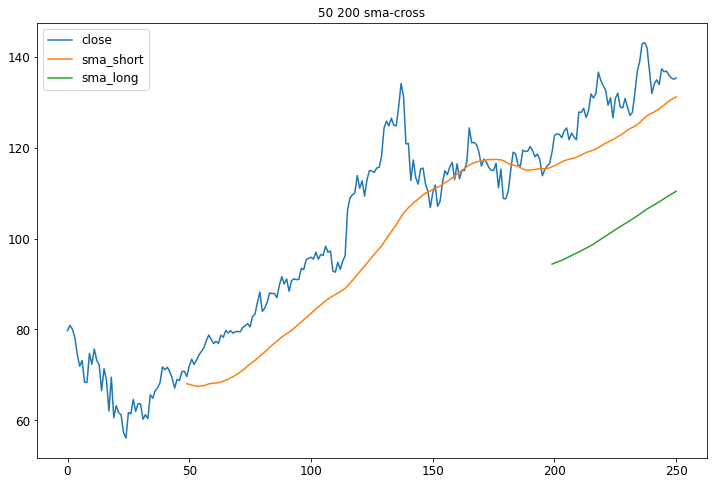

In [17]:
data[['close', 'sma_short', 'sma_long']] \
    .plot(figsize=(12, 8), title=f'{SMA_SHORT} {SMA_LONG} sma-cross', fontsize=12)
plt.legend(fontsize=12);

In [19]:
data['position'] = np.where(data['sma_short'] > data['sma_long'], 1, -1)

[2021-02-16 21:08:28,911] {utils.py:141} INFO - NumExpr defaulting to 4 threads.


In [21]:
data.tail(10)

,time,open,high,low,close,volume,sma_short,sma_long,position
241,2021-02-01 07:00:00,133.12,135.38,130.96,134.14,25563867,127.9386,107.47065,1
242,2021-02-02 07:00:00,134.76,136.45,134.50,134.99,19587632,128.2778,107.79210,1
243,2021-02-03 07:00:00,135.70,136.00,133.62,133.94,18380120,128.5838,108.11565,1
244,2021-02-04 07:00:00,136.02,137.46,134.63,137.39,19081589,128.9848,108.46715,1
245,2021-02-05 07:00:00,137.32,138.40,135.87,136.76,15678428,129.4430,108.80580,1
246,2021-02-08 07:00:00,137.18,137.91,135.00,136.91,16655834,129.8778,109.14655,1
247,2021-02-09 07:00:00,136.01,137.87,135.80,136.01,14578810,130.2774,109.47290,1
248,2021-02-10 07:00:00,136.51,137.34,134.41,135.39,15590571,130.6534,109.79590,1
249,2021-02-11 07:00:00,135.39,136.36,133.79,135.13,13551807,130.9750,110.12330,1
250,2021-02-12 07:00:00,134.80,135.50,133.71,135.37,14199593,131.2280,110.44050,1
